In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/PPW-A/report/Tugas-PPW

/content/drive/MyDrive/PPW-A/report/Tugas-PPW


In [ ]:
!pip install Sastrawi

In [ ]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords

#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk

from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

# Baca file CSV
df = pd.read_csv("/content/drive/MyDrive/PPW-A/report/Tugas-PPW/data_berita_detik.csv")
df.head()

,judul,isi,tanggal,kategori
0,"Daftar Game PS4, PS5, Xbox, dan PC Rilis Mingg...",Jakarta - Oktober 2024 sudah berjalan selama t...,"Selasa, 08 Okt 2024 14:45 WIB",Games
1,Studi: Game Single Player Lebih Disukai Gamer ...,Jakarta - Di tengah kepopuleran game multiplay...,"Selasa, 08 Okt 2024 12:15 WIB",Games
2,MPL ID S14: Ini Jadwal Playoff dan Bracket Per...,Jakarta - Rangkaian pertandingan di fase liga ...,"Senin, 07 Okt 2024 13:15 WIB",Games
3,Daftar Tim yang Gugur dan Lolos Playoff MPL ID...,Jakarta - MPL ID S14 memasuki babak playoff. S...,"Senin, 07 Okt 2024 11:15 WIB",Games
4,Studi Ungkap Main Game PowerWash Simulator Bai...,"Jakarta - Sebuah studi mengungkapkan, memainka...","Minggu, 06 Okt 2024 15:06 WIB",Games


In [ ]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[1]
print(sample_berita)

Jakarta - Di tengah kepopuleran game multiplayer online, sebuah studi mengungkapkan data yang cukup mengejutkan. Ternyata banyak gamer yang lebih doyan menikmati game single player. Survei yang dilakukan oleh Midia Research ini, menunjukkan kalau 53% dari respondennya tak suka main game online PvP. Datanya dikumpulkan dalam rentan waktu pada Q1 2023 - Q1 2024. Mereka melakukan pendataan terhadap gamer yang berdomisili di Amerika Serikat, Inggris, Australia, Kanada, Jerman, Prancis, Polandia, Turki, dan Afrika Selatan, seperti dikutip detikINET dari Games Industry, Selasa (8/10/2024). Fakta lain yang mereka temukan ialah ternyata yang suka game single player bukan gamer muda. Dimulai dari gamer dengan rentang usia 35-44 tahun, yang mana 49% di antaranya lebih suka game single player. Lalu di usia 45-54 tahun, 65% gamer di dalamnya lebih suka game single player. Nah persentasenya lebih tinggi lagi, ketika menyentuh usia di atas 55 tahun, karena sebanyak 74% tak suka main game multiplayer

In [ ]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df

,kalimat ke n,kalimat
0,Kalimat ke 1,Jakarta - Di tengah kepopuleran game multiplay...
1,Kalimat ke 2,Ternyata banyak gamer yang lebih doyan menikma...
2,Kalimat ke 3,"Survei yang dilakukan oleh Midia Research ini,..."
3,Kalimat ke 4,Datanya dikumpulkan dalam rentan waktu pada Q1...
4,Kalimat ke 5,Mereka melakukan pendataan terhadap gamer yang...
5,Kalimat ke 6,Fakta lain yang mereka temukan ialah ternyata ...
6,Kalimat ke 7,Dimulai dari gamer dengan rentang usia 35-44 t...
7,Kalimat ke 8,"Lalu di usia 45-54 tahun, 65% gamer di dalamny..."
8,Kalimat ke 9,"Nah persentasenya lebih tinggi lagi, ketika me..."
9,Kalimat ke 10,"Sementara itu, pemain berusia antara 20-24 tah..."


In [ ]:
# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,kalimat ke n,final
0,Kalimat ke 1,jakarta populer game multiplayer online studi ...
1,Kalimat ke 2,gamer doyan nikmat game single player
2,Kalimat ke 3,survei midia research responden suka main game...
3,Kalimat ke 4,data kumpul rentan q q
4,Kalimat ke 5,data gamer domisili amerika serikat inggris au...
5,Kalimat ke 6,fakta temu suka game single player gamer muda
6,Kalimat ke 7,gamer rentang usia suka game single player
7,Kalimat ke 8,usia gamer dalam suka game single player
8,Kalimat ke 9,persentase sentuh usia suka main game multipla...
9,Kalimat ke 10,main usia suka main game pvp


In [ ]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,aaa,acu,afrika,ambil,amerika,android,angka,asumsi,australia,...,tawar,temu,the,tinggi,turki,ultimate,unggul,usia,war,wukong
0,Kalimat ke 1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,Kalimat ke 2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,Kalimat ke 3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,Kalimat ke 4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,Kalimat ke 5,0.000000,0.000000,0.236874,0.00000,0.236874,0.000000,0.000000,0.000000,0.236874,...,0.000000,0.00000,0.000000,0.000000,0.236874,0.000000,0.000000,0.000000,0.000000,0.00000
5,Kalimat ke 6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.47014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,Kalimat ke 7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424864,0.000000,0.00000
7,Kalimat ke 8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424864,0.000000,0.00000
8,Kalimat ke 9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344663,0.000000,0.00000
9,Kalimat ke 10,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366458,0.000000,0.00000


In [ ]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21,Kalimat ke 22,Kalimat ke 23,Kalimat ke 24,Kalimat ke 25,Kalimat ke 26
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.048752,0.123813,0.128716,0.048045,0.038339,0.046465,0.046465,0.272166,0.040077,...,0.0,0.040700,0.000000,0.0,0.000000,0.000000,0.038096,0.031166,0.000000,0.0
Kalimat ke 2,0.048752,1.000000,0.045643,0.000000,0.048051,0.322033,0.390283,0.390283,0.053673,0.057067,...,0.0,0.240617,0.000000,0.0,0.000000,0.000000,0.139735,0.044379,0.000000,0.0
Kalimat ke 3,0.123813,0.045643,1.000000,0.000000,0.000000,0.105836,0.128267,0.128267,0.306095,0.477590,...,0.0,0.038104,0.000000,0.0,0.000000,0.000000,0.035667,0.029179,0.000000,0.0
Kalimat ke 4,0.128716,0.000000,0.000000,1.000000,0.072621,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 5,0.048045,0.048051,0.000000,0.072621,1.000000,0.037788,0.045797,0.045797,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 6,0.038339,0.322033,0.105836,0.000000,0.037788,1.000000,0.408308,0.408308,0.124456,0.132326,...,0.0,0.189224,0.000000,0.0,0.000000,0.000000,0.109889,0.034900,0.000000,0.0
Kalimat ke 7,0.046465,0.390283,0.128267,0.000000,0.045797,0.408308,1.000000,0.675352,0.297268,0.316065,...,0.0,0.229327,0.000000,0.0,0.000000,0.000000,0.133178,0.042296,0.000000,0.0
Kalimat ke 8,0.046465,0.390283,0.128267,0.000000,0.045797,0.408308,0.675352,1.000000,0.297268,0.316065,...,0.0,0.229327,0.000000,0.0,0.000000,0.000000,0.133178,0.042296,0.000000,0.0
Kalimat ke 9,0.272166,0.053673,0.306095,0.000000,0.000000,0.124456,0.297268,0.297268,1.000000,0.509011,...,0.0,0.044808,0.000000,0.0,0.000000,0.000000,0.041941,0.034312,0.000000,0.0


In [ ]:
# Tetapkan ambang batas (threshold) 0.5
threshold = 0.3

# Buat matriks adjacency: jika cosine similarity >= 0.5, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21,Kalimat ke 22,Kalimat ke 23,Kalimat ke 24,Kalimat ke 25,Kalimat ke 26
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 2,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 7,0,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 8,0,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 9,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


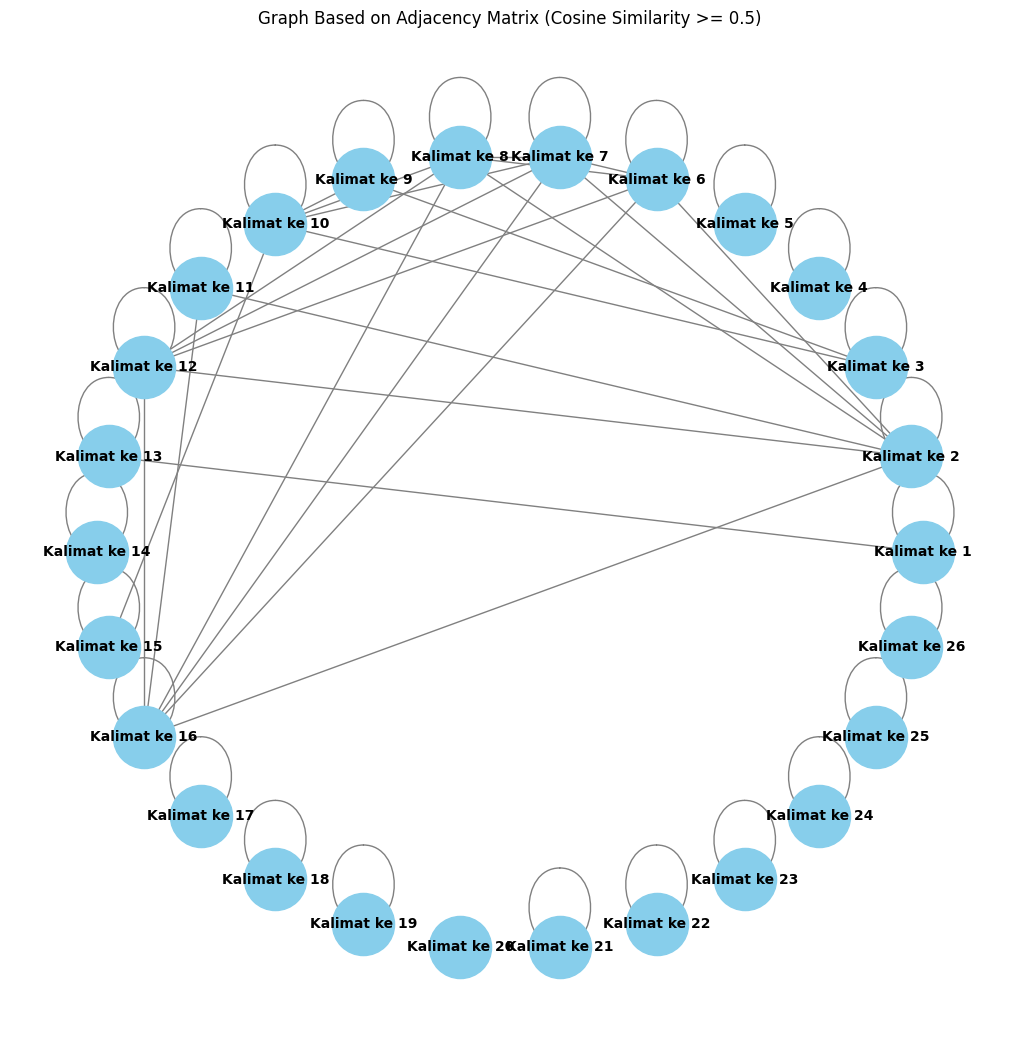

In [ ]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf dengan layout circular
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G)  # Gunakan circular layout agar rapi
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity >= 0.5)")
plt.show()

In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df


,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.000000,0.12,0.040000
1,Kalimat ke 2,0.013333,0.32,0.235294
2,Kalimat ke 3,0.000000,0.16,0.166667
3,Kalimat ke 4,0.000000,0.08,0.000000
4,Kalimat ke 5,0.000000,0.08,0.000000
5,Kalimat ke 6,0.000000,0.28,0.222222
6,Kalimat ke 7,0.033333,0.32,0.285714
7,Kalimat ke 8,0.033333,0.32,0.285714
8,Kalimat ke 9,0.000000,0.16,0.166667
9,Kalimat ke 10,0.076667,0.28,0.250000


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Pastikan untuk mengunduh stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi untuk memisahkan dan memproses berita
def process_news_input(user_input):
    # Memisahkan kalimat
    result_list = []
    sentences = user_input.split('.')  # Pisahkan kalimat berdasarkan titik
    sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong
    for i, sentence in enumerate(sentences, 1):
        result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

    result_df = pd.DataFrame(result_list)

    # Fungsi preprocessing yang disesuaikan
    def remove_url(data_berita):
        url = re.compile(r'https?://\S+|www\.S+')
        return url.sub(r'', data_berita)

    def remove_html(data_berita):
        html = re.compile(r'<.#?>')
        return html.sub(r'', data_berita)

    def remove_emoji(data_berita):
        emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', data_berita)

    def remove_numbers(data_berita):
        data_berita = re.sub(r'\d+', '', data_berita)
        return data_berita

    def remove_symbols(data_berita):
        data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
        return data_berita

    def case_folding(text):
        if isinstance(text, str):
            return text.lower()
        return text

    def tokenize(text):
        return text.split()

    def remove_stopwords(text):
        return [word for word in text if word not in stop_words]

    # Inisialisasi stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    def stemming(text):
        return [stemmer.stem(word) for word in text]

    # Looping setiap kalimat di dataframe 'result_df'
    result_df['clean'] = result_df['kalimat'].apply(remove_url)
    result_df['clean'] = result_df['clean'].apply(remove_html)
    result_df['clean'] = result_df['clean'].apply(remove_emoji)
    result_df['clean'] = result_df['clean'].apply(remove_symbols)
    result_df['clean'] = result_df['clean'].apply(remove_numbers)
    result_df['clean'] = result_df['clean'].apply(case_folding)
    result_df['tokenize'] = result_df['clean'].apply(tokenize)
    result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
    result_df['stemming'] = result_df['stopword removal'].apply(stemming)

    # Gabungkan kata setelah stemming
    result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

    # TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(result_df['final'])

    # Cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Matriks adjacency
    threshold = 0.6
    adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

    # Buat graf dari matriks adjacency
    G = nx.from_numpy_array(adjacency_matrix)

    # Atur label node
    mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
    G = nx.relabel_nodes(G, mapping)

    # Hitung centrality
    betweenness_centrality = nx.betweenness_centrality(G)
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)

    # Buat dataframe untuk centrality
    centrality_df = pd.DataFrame({
        'Kalimat': list(betweenness_centrality.keys()),
        'Betweenness Centrality': list(betweenness_centrality.values()),
        'Degree Centrality': list(degree_centrality.values()),
        'Closeness Centrality': list(closeness_centrality.values())
    })

    return result_df[['kalimat ke n', 'kalimat', 'final']], cosine_sim, adjacency_matrix, G, centrality_df

# Input dari pengguna
user_input = input("Masukkan isi berita: ")

# Proses berita dan ambil hasil
result_df, cosine_sim, adjacency_matrix, G, centrality_df = process_news_input(user_input)

# Pilih jenis centrality untuk dihitung
print("\nPilih jenis centrality yang ingin dihitung:")
print("1. Betweenness Centrality")
print("2. Degree Centrality")
print("3. Closeness Centrality")
choice = int(input("Masukkan pilihan (1/2/3): "))

# Ambil centrality sesuai pilihan
if choice == 1:
    centrality_values = centrality_df[['Kalimat', 'Betweenness Centrality']]
    centrality_name = 'Betweenness Centrality'
elif choice == 2:
    centrality_values = centrality_df[['Kalimat', 'Degree Centrality']]
    centrality_name = 'Degree Centrality'
elif choice == 3:
    centrality_values = centrality_df[['Kalimat', 'Closeness Centrality']]
    centrality_name = 'Closeness Centrality'
else:
    print("Pilihan tidak valid.")
    exit()

# Ringkasan: 3 kalimat dengan centrality tertinggi
top_sentences = centrality_values.nlargest(3, centrality_name)

# Tampilkan hasil
print("\nHasil Pemisahan Kalimat:")
print(result_df)
print("\nCosine Similarity Matrix:")
print(cosine_sim)
print("\nAdjacency Matrix:")
print(adjacency_matrix)
print("\nGraph:")
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')
plt.title("Graph Based on Adjacency Matrix")
plt.show()
print("\nNilai Centrality:")
print(centrality_df)
print(f"\nRingkasan (3 Kalimat Teratas Berdasarkan {centrality_name}):")
print(top_sentences)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: Interrupted by user

In [ ]:
import spacy
import pandas as pd

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Inisialisasi DataFrame kosong untuk menyimpan ringkasan
df_ringkasan = pd.DataFrame(columns=['Ringkasan'])

# Loop untuk setiap baris data
for i in range(100):
    # Inisialisasi teks yang akan diringkas
    teks_ringkasan = df['isi'].iloc[i]

    # Analisis teks menggunakan spaCy
    doc = nlp(teks_ringkasan)

    # Ambil setiap kalimat dari dokumen
    kalimat_utama = [kalimat.text for kalimat in doc.sents]

    # Gabungkan beberapa kalimat sesuai kebutuhan Anda
    jumlah_kalimat = 10
    data_ringkas = " ".join(kalimat_utama[:jumlah_kalimat])

    # Tambahkan ringkasan ke DataFrame
    df_ringkasan = pd.concat([df_ringkasan, pd.DataFrame({'Ringkasan': [data_ringkas]})], ignore_index=True)


In [ ]:
df_ringkasan